# Kaggle Competition

## Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
filepath = 'https://raw.githubusercontent.com/fedeamedeo/machine-learning-project/main/Data/'
interactions = pd.read_csv(filepath + 'interactions_train.csv')
items = pd.read_csv(filepath + 'items.csv')

In [3]:
#display data
display(interactions.head())
display(items.head())

,u,i,t
0,4456,8581,1.687541e+09
1,142,1964,1.679585e+09
2,362,3705,1.706872e+09
3,1809,11317,1.673533e+09
4,4384,1323,1.681402e+09


,Title,Author,ISBN Valid,Publisher,Subjects,i
0,Classification décimale universelle : édition ...,NaN,9782871303336; 2871303339,Ed du CEFAL,Classification décimale universelle; Indexatio...,0
1,Les interactions dans l'enseignement des langu...,"Cicurel, Francine, 1947-",9782278058327; 2278058320,Didier,didactique--langue étrangère - enseignement; d...,1
2,Histoire de vie et recherche biographique : pe...,NaN,2343190194; 9782343190198,L'Harmattan,Histoires de vie en sociologie; Sciences socia...,2
3,Ce livre devrait me permettre de résoudre le c...,"Mazas, Sylvain, 1980-",9782365350020; 236535002X; 9782365350488; 2365...,Vraoum!,Moyen-Orient; Bandes dessinées autobiographiqu...,3
4,Les années glorieuses : roman /,"Lemaitre, Pierre, 1951-",9782702180815; 2702180817; 9782702183618; 2702...,Calmann-Lévy,France--1945-1975; Roman historique; Roman fra...,4


In [4]:
# Check for duplicates in the interactions DataFrame
duplicates = interactions.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows in interactions: {num_duplicates}")

# Display the duplicate rows if any
if num_duplicates > 0:
    print("Duplicate rows:")
    print(interactions[duplicates])

Number of duplicate rows in interactions: 2
Duplicate rows:
          u      i             t
6103   7210  12290  1.718023e+09
44025  1323  10037  1.700055e+09


In [5]:
# Drop duplicate rows from the interactions DataFrame
interactions = interactions.drop_duplicates()

# Verify the shape after dropping duplicates
print(f"Shape after dropping duplicates: {interactions.shape}")

Shape after dropping duplicates: (87045, 3)


In [6]:
# Convert 't' column to datetime
interactions['datetime'] = pd.to_datetime(interactions['t'], unit='s')


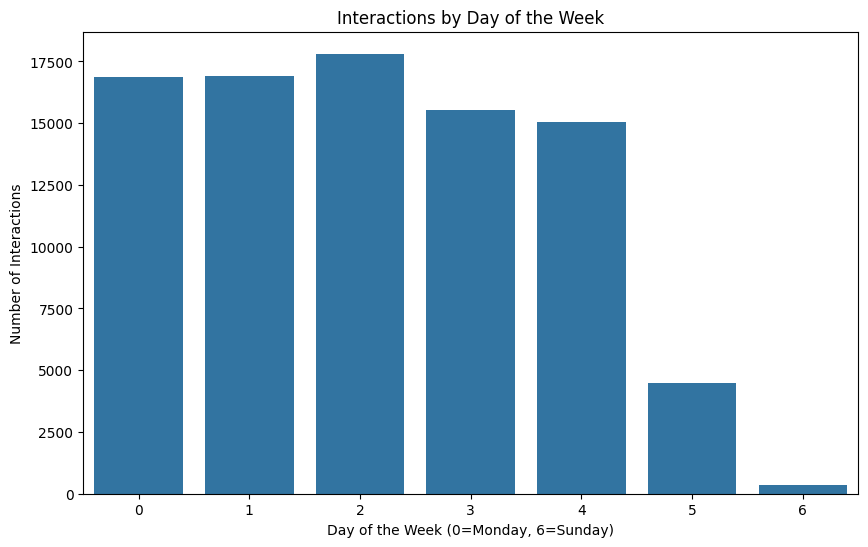

In [7]:
# prompt: plot interactions by day of the week

# Create a 'day_of_week' column
interactions['day_of_week'] = interactions['datetime'].dt.dayofweek

# Group interactions by day of the week and count interactions
# Use .size() to get the count of interactions for each day
interactions_by_day = interactions.groupby('day_of_week').size()

# Reset the index to have 'day_of_week' as a column
interactions_by_day = interactions_by_day.reset_index(name='counts')

# Plot the interactions by day of the week
plt.figure(figsize=(10, 6))
# Use 'day_of_week' and 'counts' columns for plotting
sns.barplot(x='day_of_week', y='counts', data=interactions_by_day)
plt.title('Interactions by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Interactions')
plt.show()


Basic Statistics:
Number of unique users: 7838
Number of unique items: 15109
Time range: 1672663643.0 to 1728925054.0


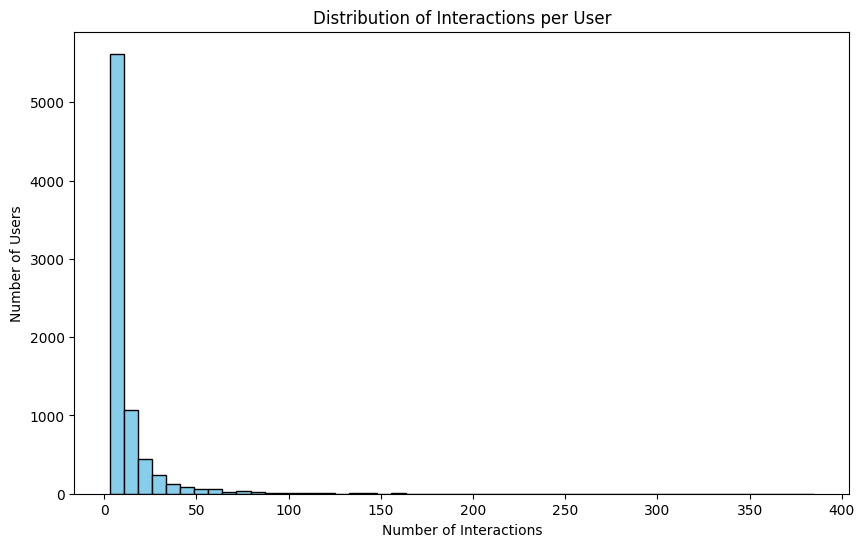

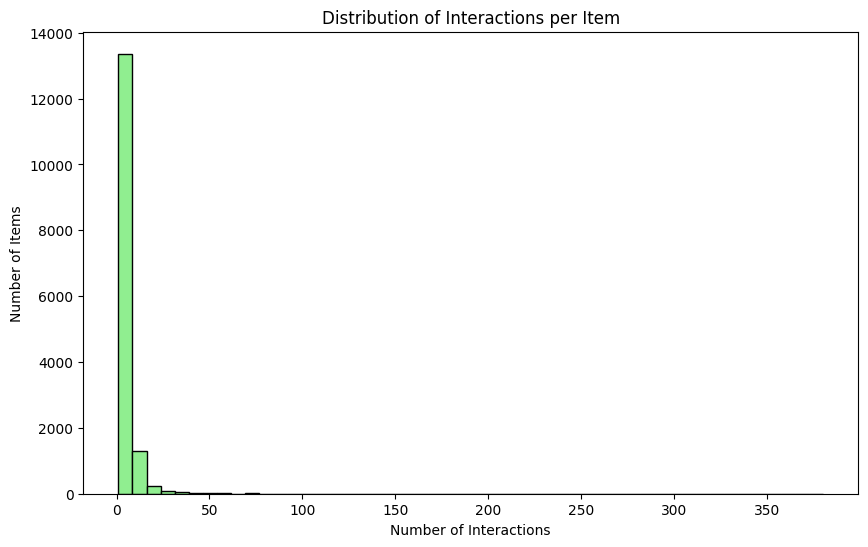

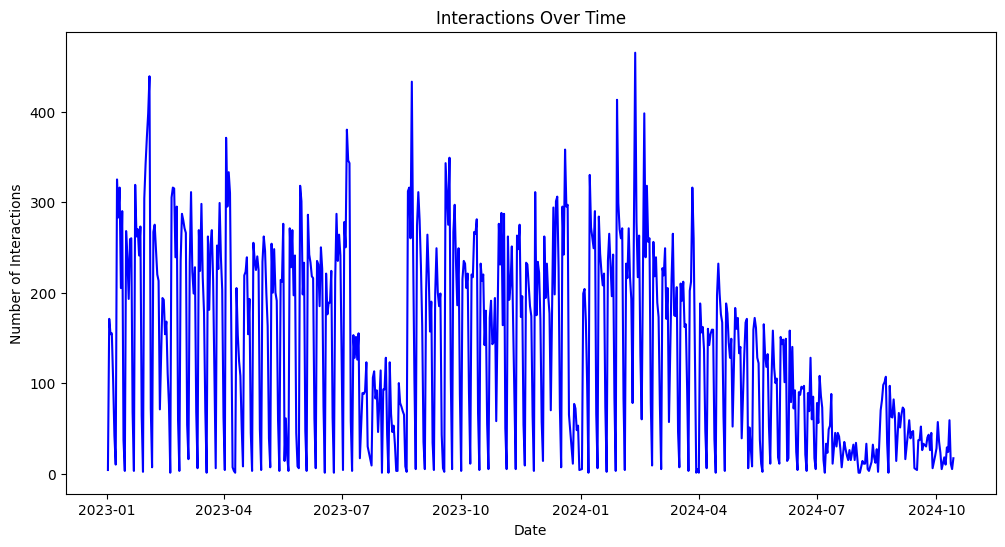

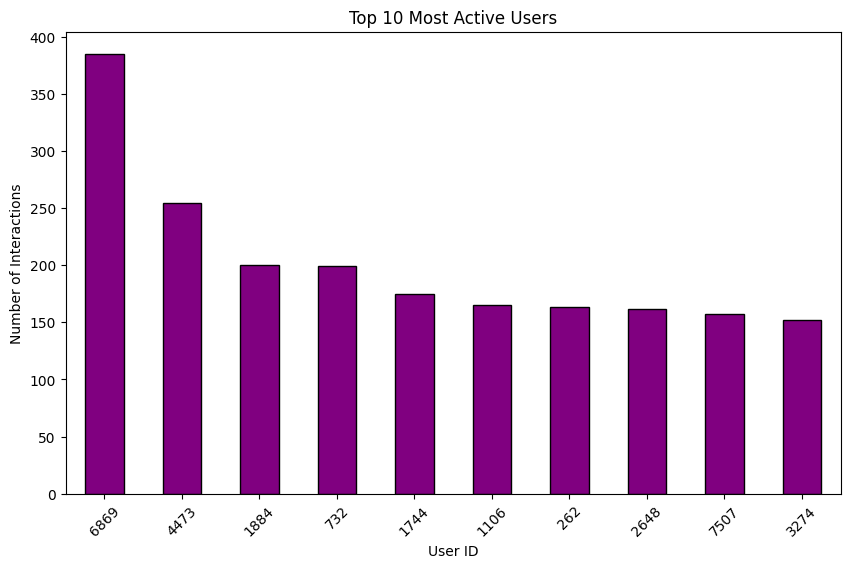

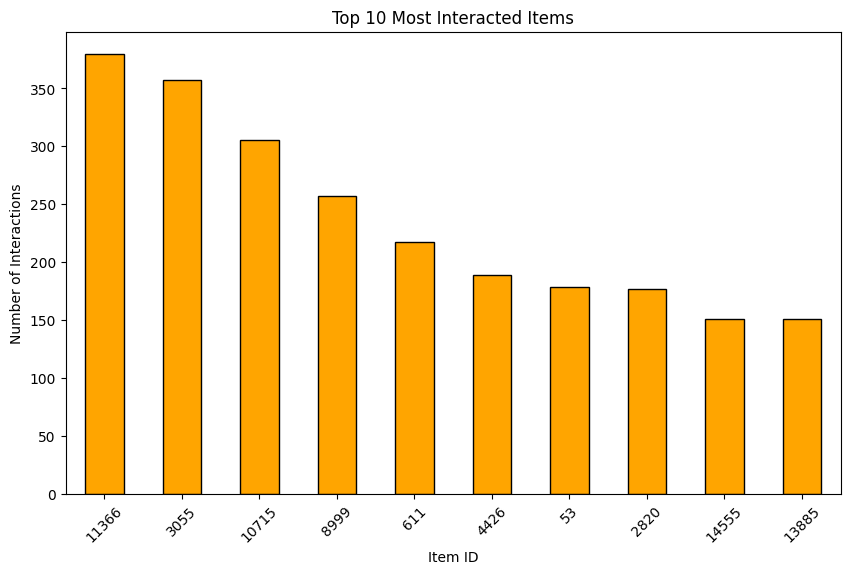

Sample of interactions_with_items dataset:
      u      i             t            datetime  day_of_week  hour  month  \
0  4456   8581  1.687541e+09 2023-06-23 17:24:46            4    17      6   
1   142   1964  1.679585e+09 2023-03-23 15:30:06            3    15      3   
2   362   3705  1.706872e+09 2024-02-02 11:00:59            4    11      2   
3  1809  11317  1.673533e+09 2023-01-12 14:19:22            3    14      1   
4  4384   1323  1.681402e+09 2023-04-13 16:09:22            3    16      4   

         date                                              Title  \
0  2023-06-23                        Ashes falling for the sky /   
1  2023-03-23                                  La page blanche /   
2  2024-02-02                                   Aysuun : roman /   
3  2023-01-12                   Le cercle des rêveurs éveillés /   
4  2023-04-13  L'examen clinique de l'aîné : guide d'évaluati...   

                   Author                                         ISBN Valid  \

In [8]:
# 1. Basic Statistics
print("Basic Statistics:")
print(f"Number of unique users: {interactions['u'].nunique()}")
print(f"Number of unique items: {interactions['i'].nunique()}")
print(f"Time range: {interactions['t'].min()} to {interactions['t'].max()}")

# 2. Interactions per User
user_interactions = interactions['u'].value_counts()
plt.figure(figsize=(10, 6))
plt.hist(user_interactions, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Interactions per User')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Users')
plt.show()

# 3. Interactions per Item
item_interactions = interactions['i'].value_counts()
plt.figure(figsize=(10, 6))
plt.hist(item_interactions, bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of Interactions per Item')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Items')
plt.show()

# 4. Temporal Analysis
interactions['hour'] = interactions['datetime'].dt.hour
interactions['day_of_week'] = interactions['datetime'].dt.dayofweek
interactions['month'] = interactions['datetime'].dt.month

# Line plot of interactions over time
interactions['date'] = interactions['datetime'].dt.date
daily_interactions = interactions.groupby('date').size()
plt.figure(figsize=(12, 6))
daily_interactions.plot(kind='line', color='blue')
plt.title('Interactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Interactions')
plt.show()


# 5. Top Users and Items
top_users = user_interactions.head(10)
plt.figure(figsize=(10, 6))
top_users.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Top 10 Most Active Users')
plt.xlabel('User ID')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=45)
plt.show()

top_items = item_interactions.head(10)
plt.figure(figsize=(10, 6))
top_items.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 10 Most Interacted Items')
plt.xlabel('Item ID')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=45)
plt.show()


# 7. Merge with Metadata
interactions_with_items=pd.merge(interactions, items, on='i')
print("Sample of interactions_with_items dataset:")
print(interactions_with_items.head())

# 8. Missing Data in merged df
print("Missing Data in interactions_with_items:")
print(interactions_with_items.isnull().sum())

<ipython-input-9-6557b07461ff>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')


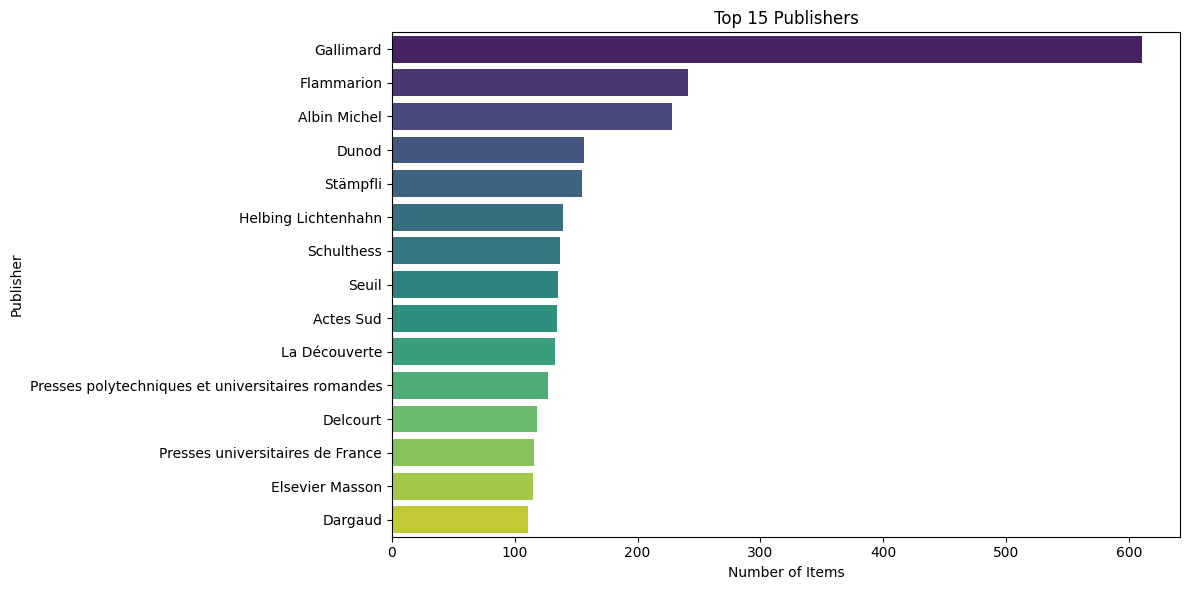

<ipython-input-9-6557b07461ff>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=author_counts.values, y=author_counts.index, palette='coolwarm')


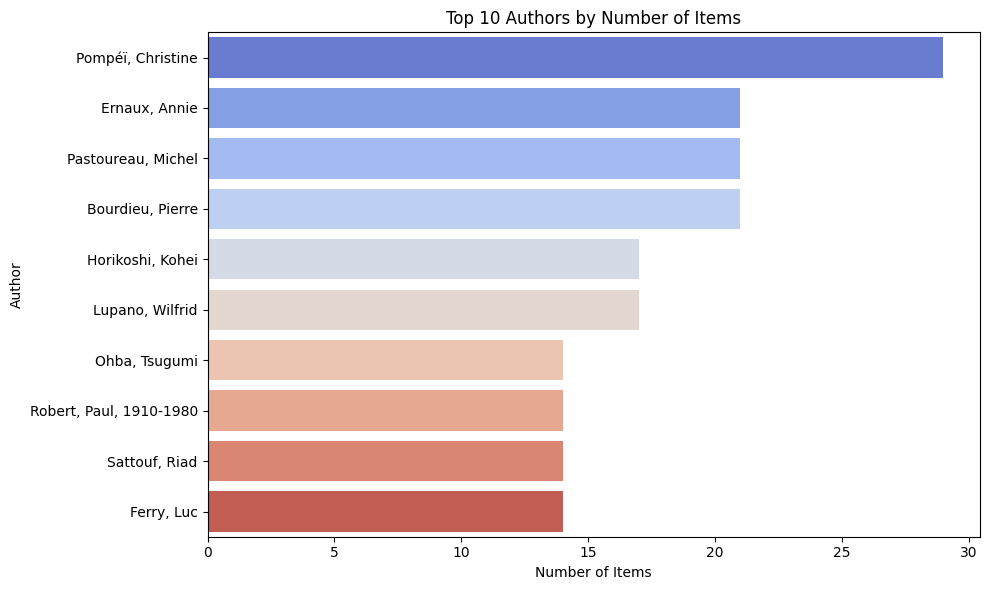

<ipython-input-9-6557b07461ff>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_subjects.values, y=top_subjects.index, palette='mako')


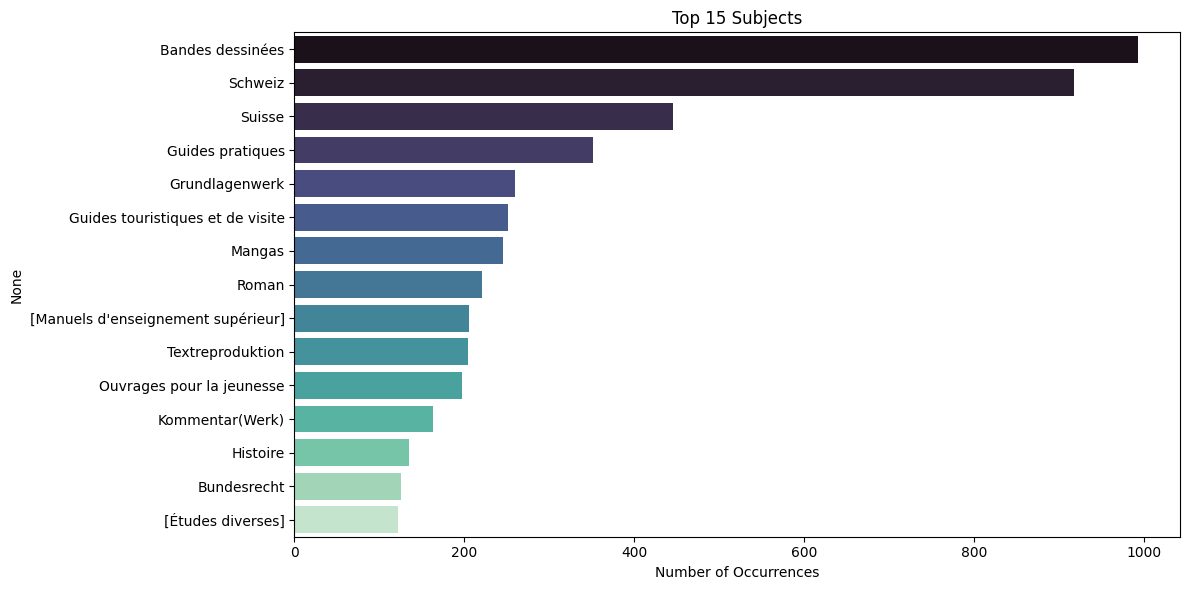

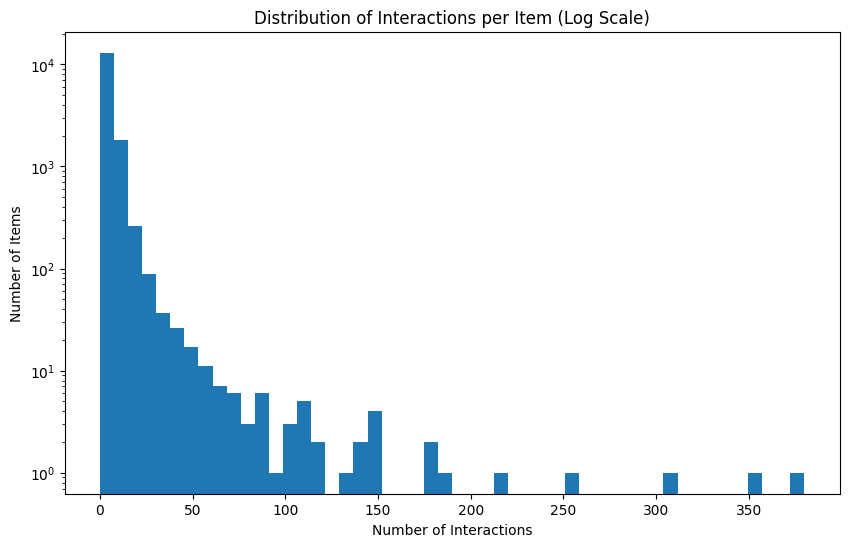

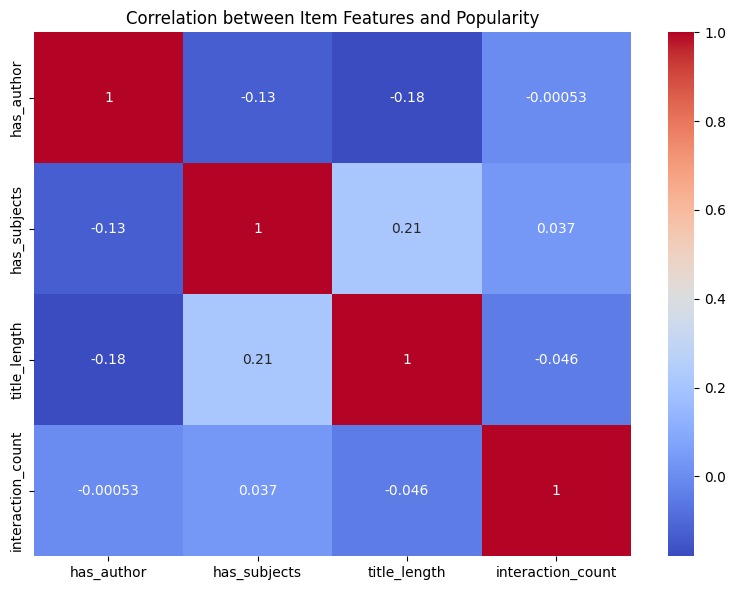

In [9]:
# Distribution of publishers
plt.figure(figsize=(12, 6))
top_publishers = items['Publisher'].value_counts().head(15)
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')
plt.title('Top 15 Publishers')
plt.xlabel('Number of Items')
plt.tight_layout()
plt.show()



# Author analysis
plt.figure(figsize=(10, 6))
author_counts = items['Author'].value_counts().head(10)
sns.barplot(x=author_counts.values, y=author_counts.index, palette='coolwarm')
plt.title('Top 10 Authors by Number of Items')
plt.xlabel('Number of Items')
plt.tight_layout()
plt.show()

# Subject analysis
# Extract and count subjects (handling multiple subjects per item)
all_subjects = []
for subjects in items['Subjects'].dropna():
    subject_list = str(subjects).split(';')
    all_subjects.extend([subj.strip() for subj in subject_list])

subject_counts = pd.Series(all_subjects).value_counts()
plt.figure(figsize=(12, 6))
top_subjects = subject_counts.head(15)
sns.barplot(x=top_subjects.values, y=top_subjects.index, palette='mako')
plt.title('Top 15 Subjects')
plt.xlabel('Number of Occurrences')
plt.tight_layout()
plt.show()

# Analyze book popularity based on interactions
if 'interactions' in globals():
    plt.figure(figsize=(10, 6))

    # Reset the index of value_counts to create a DataFrame
    item_interaction_counts = interactions['i'].value_counts().reset_index()
    item_interaction_counts.columns = ['i', 'count']  # Rename columns for clarity

    # Merge with the items dataset
    items_with_interactions = items.merge(item_interaction_counts, on='i', how='left')
    items_with_interactions['interaction_count'] = items_with_interactions['count'].fillna(0)


    # Plot the distribution of interactions
    plt.hist(items_with_interactions['interaction_count'], bins=50, log=True)
    plt.title('Distribution of Interactions per Item (Log Scale)')
    plt.xlabel('Number of Interactions')
    plt.ylabel('Number of Items')
    plt.show()

    # Correlation between metadata and popularity
    # Create indicator for having Author information
    items_with_interactions['has_author'] = items_with_interactions['Author'].notna().astype(int)
    items_with_interactions['has_subjects'] = items_with_interactions['Subjects'].notna().astype(int)

    # Create title length feature
    items_with_interactions['title_length'] = items_with_interactions['Title'].str.len()

    # Analyze correlation with popularity
    features = ['has_author', 'has_subjects', 'title_length']
    corr = items_with_interactions[features + ['interaction_count']].corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation between Item Features and Popularity')
    plt.tight_layout()
    plt.show()

Missing values in items dataset:
Title            0
Author        2653
ISBN Valid     723
Publisher       25
Subjects      2223
i                0
dtype: int64

Percentage of missing values in items dataset:
Title          0.00
Author        17.35
ISBN Valid     4.73
Publisher      0.16
Subjects      14.54
i              0.00
dtype: float64

Missing values in interactions_with_items dataset:
u                  0
i                  0
t                  0
datetime           0
day_of_week        0
hour               0
month              0
date               0
Title              0
Author         15130
ISBN Valid      3537
Publisher        123
Subjects       10876
dtype: int64

Percentage of missing values in interactions_with_items dataset:
u               0.00
i               0.00
t               0.00
datetime        0.00
day_of_week     0.00
hour            0.00
month           0.00
date            0.00
Title           0.00
Author         17.38
ISBN Valid      4.06
Publisher       0.14
S

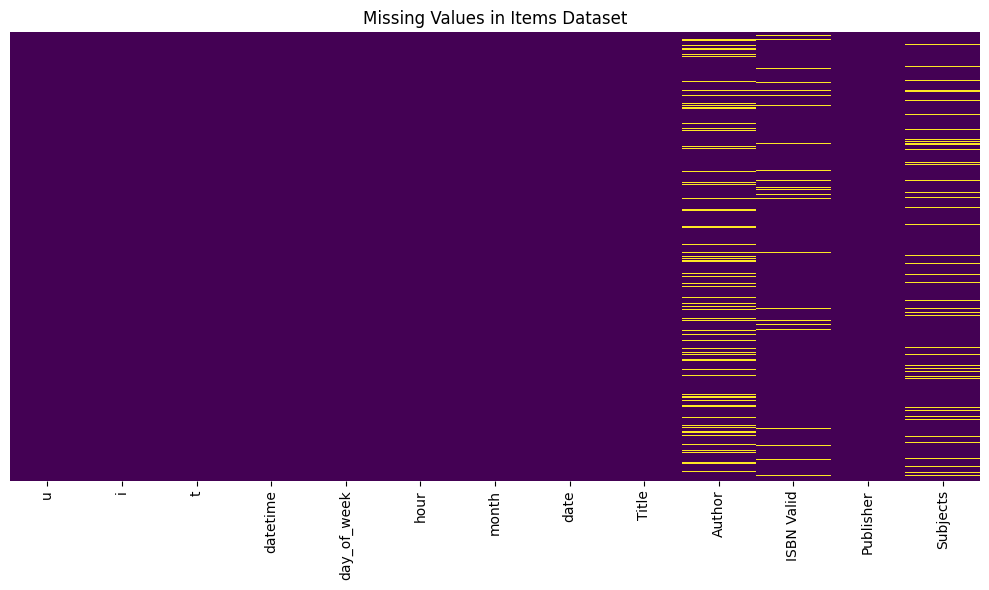

In [44]:
# Analyzing missing values in the datasets
print("Missing values in items dataset:")
missing_items = items.isnull().sum()
print(missing_items)
print("\nPercentage of missing values in items dataset:")
print((missing_items / len(items) * 100).round(2))

print("\nMissing values in interactions_with_items dataset:")
missing_interactions = interactions_with_items.isnull().sum()
print(missing_interactions)
print("\nPercentage of missing values in interactions_with_items dataset:")
print((missing_interactions / len(interactions_with_items) * 100).round(2))

# Visualizing missing data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(interactions_with_items.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values in Items Dataset')
plt.tight_layout()
plt.show()

In [11]:
# Create a copy of the items dataframe to work with
items_cleaned = items.copy()

# Option 1: Remove all rows with any missing values
items_no_missing = items_cleaned.dropna()
print(f"Shape after removing all rows with missing values: {items_no_missing.shape}")
print(f"Removed {items.shape[0] - items_no_missing.shape[0]} rows out of {items.shape[0]} total rows")


Shape after removing all rows with missing values: (10147, 6)
Removed 5144 rows out of 15291 total rows


In [12]:
'''import requests
import time
import pandas as pd
from tqdm.notebook import tqdm

# Create a copy of the items dataframe to work with
items_improved = items.copy()

# Function to extract first ISBN number from the ISBN Valid field
def extract_first_isbn(isbn_field):
    if pd.isna(isbn_field):
        return None
    # Split by semicolon and take first value
    isbn_list = str(isbn_field).split(';')
    if len(isbn_list) > 0:
        # Clean up the ISBN
        isbn = isbn_list[0].strip()
        # Remove any non-digit characters if needed
        isbn = ''.join(c for c in isbn if c.isdigit())
        return isbn
    return None

# Function to fetch book metadata from Google Books API
def fetch_book_metadata(isbn):
    if not isbn:
        return None, None, None

    url = f"https://www.googleapis.com/books/v1/volumes?q=isbn:{isbn}"
    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            items = data.get("items", [])
            if items:
                volume_info = items[0].get("volumeInfo", {})
                authors = volume_info.get("authors", [])
                author = authors[0] if authors else None
                publisher = volume_info.get("publisher")
                categories = volume_info.get("categories", [])
                category = categories[0] if categories else None
                return author, publisher, category
    except Exception as e:
        print(f"Error fetching data for ISBN {isbn}: {e}")

    return None, None, None

# Count missing values before enhancement
print("Missing values before enhancement:")
print(items.isnull().sum())

# Process books with missing data that have ISBNs
missing_author_items = items_improved[(items_improved['Author'].isna()) & (~items_improved['ISBN Valid'].isna())]
missing_subject_items = items_improved[(items_improved['Subjects'].isna()) & (~items_improved['ISBN Valid'].isna())]

# Combine indices to avoid processing the same book twice
all_indices = list(set(missing_author_items.index) | set(missing_subject_items.index))

# Process books with API calls (with rate limiting)
print(f"\nFetching metadata for {len(all_indices)} books with missing data...")

successful_fetches = 0
for idx in tqdm(all_indices):
    # Check if we need to process this book
    need_author = pd.isna(items_improved.at[idx, 'Author'])
    need_subject = pd.isna(items_improved.at[idx, 'Subjects'])

    if need_author or need_subject:
        isbn = extract_first_isbn(items_improved.at[idx, 'ISBN Valid'])
        if isbn:
            author, publisher, category = fetch_book_metadata(isbn)

            if author and need_author:
                items_improved.at[idx, 'Author'] = author
                successful_fetches += 1

            if category and need_subject:
                items_improved.at[idx, 'Subjects'] = category
                successful_fetches += 1

            if publisher and pd.isna(items_improved.at[idx, 'Publisher']):
                items_improved.at[idx, 'Publisher'] = publisher

            # Sleep to respect API rate limits
            time.sleep(0.1)

# For remaining missing values, use defaults
items_improved['Author'] = items_improved['Author'].fillna("Unknown Author")
items_improved['Subjects'] = items_improved['Subjects'].fillna("Uncategorized")
items_improved['Publisher'] = items_improved['Publisher'].fillna("Unknown Publisher")
items_improved['ISBN Valid'] = items_improved['ISBN Valid'].fillna("Not Available")

# Print statistics on the enhanced dataset
print("\nMissing values after enhancement:")
print(items_improved.isnull().sum())
print(f"\nSuccessful API metadata fetches: {successful_fetches}")

# Create the enhanced version of interactions_with_items
interactions_with_items_improved = interactions.merge(items_improved, on='i', how='left')

# Check for any remaining missing values
print("\nMissing values in enhanced interactions with items:")
print(interactions_with_items_improved.isnull().sum())

# Show a sample of the enhanced data
print("\nSample of enhanced data:")
print(interactions_with_items_improved.sample(5))'''

'import requests\nimport time\nimport pandas as pd\nfrom tqdm.notebook import tqdm\n\n# Create a copy of the items dataframe to work with\nitems_improved = items.copy()\n\n# Function to extract first ISBN number from the ISBN Valid field\ndef extract_first_isbn(isbn_field):\n    if pd.isna(isbn_field):\n        return None\n    # Split by semicolon and take first value\n    isbn_list = str(isbn_field).split(\';\')\n    if len(isbn_list) > 0:\n        # Clean up the ISBN\n        isbn = isbn_list[0].strip()\n        # Remove any non-digit characters if needed\n        isbn = \'\'.join(c for c in isbn if c.isdigit())\n        return isbn\n    return None\n\n# Function to fetch book metadata from Google Books API\ndef fetch_book_metadata(isbn):\n    if not isbn:\n        return None, None, None\n\n    url = f"https://www.googleapis.com/books/v1/volumes?q=isbn:{isbn}"\n    try:\n        response = requests.get(url)\n        if response.status_code == 200:\n            data = response.json(

In [53]:
#version using Google Books and Open Library as fallback
import requests
import time
import pandas as pd
from tqdm.notebook import tqdm

# Copy original items table
items_improved = items.copy()

# --- UTILITY FUNCTIONS ---

# Extract first valid ISBN from a semicolon-separated field
def extract_first_isbn(isbn_field):
    if pd.isna(isbn_field):
        return None
    isbn_list = str(isbn_field).split(';')
    if len(isbn_list) > 0:
        isbn = ''.join(c for c in isbn_list[0].strip() if c.isdigit())
        return isbn
    return None

# Fetch metadata from Google Books API
def fetch_book_metadata_google(isbn):
    url = f"https://www.googleapis.com/books/v1/volumes?q=isbn:{isbn}"
    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            items = data.get("items", [])
            if items:
                info = items[0].get("volumeInfo", {})
                author = info.get("authors", [None])[0]
                publisher = info.get("publisher")
                subject = info.get("categories", [None])[0]
                return author, publisher, subject
    except Exception as e:
        print(f"Google Books error for ISBN {isbn}: {e}")
    return None, None, None

# Fetch metadata from Open Library API
def fetch_book_metadata_openlibrary(isbn):
    url = f"https://openlibrary.org/isbn/{isbn}.json"
    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            author = None
            if "authors" in data and data["authors"]:
                author_key = data["authors"][0]["key"]
                auth_response = requests.get(f"https://openlibrary.org{author_key}.json")
                if auth_response.status_code == 200:
                    author = auth_response.json().get("name")
            publisher = data.get("publishers", [None])[0]
            subject = data.get("subjects", [None])[0] if data.get("subjects") else None
            return author, publisher, subject
    except Exception as e:
        print(f"Open Library error for ISBN {isbn}: {e}")
    return None, None, None

# --- ENRICHMENT PROCESS ---

# Identify rows with missing Author or Subjects and valid ISBN
missing_data = items_improved[
    (items_improved['Author'].isna() | items_improved['Subjects'].isna()) &
    (~items_improved['ISBN Valid'].isna())
]

print(f"\nBooks needing metadata: {len(missing_data)}")

successful_fetches = 0

for idx in tqdm(missing_data.index):
    isbn = extract_first_isbn(items_improved.at[idx, 'ISBN Valid'])
    if not isbn:
        continue

    need_author = pd.isna(items_improved.at[idx, 'Author'])
    need_subject = pd.isna(items_improved.at[idx, 'Subjects'])
    need_publisher = pd.isna(items_improved.at[idx, 'Publisher'])

    # First try Google Books
    author, publisher, subject = fetch_book_metadata_google(isbn)

    # If not found, try Open Library
    if not author and not subject and not publisher:
        author, publisher, subject = fetch_book_metadata_openlibrary(isbn)

    if author and need_author:
        items_improved.at[idx, 'Author'] = author
        successful_fetches += 1

    if subject and need_subject:
        items_improved.at[idx, 'Subjects'] = subject
        successful_fetches += 1

    if publisher and need_publisher:
        items_improved.at[idx, 'Publisher'] = publisher

    time.sleep(0.1)  # Respect API rate limits

# Final fallback for truly missing values
'''items_improved['Author'].fillna("Unknown Author", inplace=True)
items_improved['Subjects'].fillna("Uncategorized", inplace=True)
items_improved['Publisher'].fillna("Unknown Publisher", inplace=True)
items_improved['ISBN Valid'].fillna("Not Available", inplace=True)'''

# Print results
print(f"\nSuccessful metadata fetches: {successful_fetches}")
print("Remaining missing values:")
print(items_improved.isnull().sum())

# Merge back with interaction data
interactions_with_items_improved = interactions.merge(items_improved, on='i', how='left')
print("\nSample of enhanced data:")
print(interactions_with_items_improved.sample(5))



Books needing metadata: 4412


  0%|          | 0/4412 [00:00<?, ?it/s]


Successful metadata fetches: 2141
Remaining missing values:
Title            0
Author        1031
ISBN Valid     723
Publisher       24
Subjects      1704
i                0
dtype: int64

Sample of enhanced data:
          u      i             t            datetime  day_of_week  hour  \
70903  5937   2402  1.684341e+09 2023-05-17 16:28:40            2    16   
37046  2345  11434  1.706194e+09 2024-01-25 14:39:06            3    14   
83125  7343  14705  1.708356e+09 2024-02-19 15:23:40            0    15   
20036  1219   8528  1.699466e+09 2023-11-08 17:51:37            2    17   
66007  5259  11833  1.716387e+09 2024-05-22 14:13:43            2    14   

       month        date  pct_rank  \
70903      5  2023-05-17  0.277778   
37046      1  2024-01-25  0.357143   
83125      2  2024-02-19  0.666667   
20036     11  2023-11-08  0.810811   
66007      5  2024-05-22  0.666667   

                                                   Title  \
70903  Le prix des sentiments : au coeur du tr

In [14]:
bl=items_improved[items_improved['Author']=='Unknown Author']
len(bl)

1060

Missing values in items dataset:
Title            0
Author        1031
ISBN Valid     723
Publisher       24
Subjects      1704
i                0
dtype: int64

Percentage of missing values in items_improved dataset:
Title          0.00
Author         6.74
ISBN Valid     4.73
Publisher      0.16
Subjects      11.14
i              0.00
dtype: float64

Missing values in interactions_with_items_improved dataset:
u                 0
i                 0
t                 0
datetime          0
day_of_week       0
hour              0
month             0
date              0
pct_rank          0
Title             0
Author         5290
ISBN Valid     3606
Publisher       103
Subjects       9914
dtype: int64

Percentage of missing values in interactions_with_items_improved dataset:
u               0.00
i               0.00
t               0.00
datetime        0.00
day_of_week     0.00
hour            0.00
month           0.00
date            0.00
pct_rank        0.00
Title           0.00
Author   

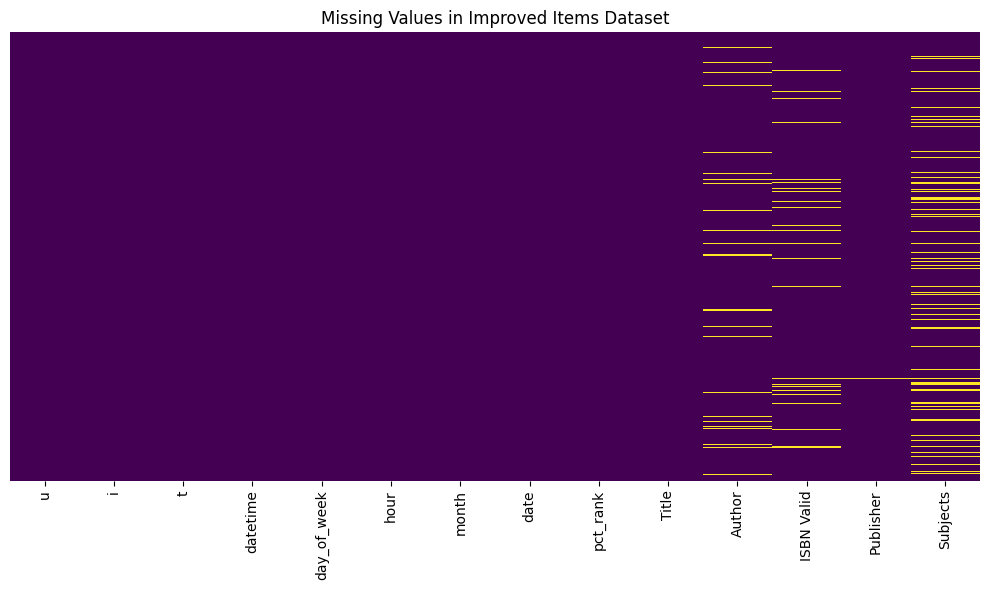

In [54]:
# Analyzing missing values after enhancement
print("Missing values in items dataset:")
missing_items = items_improved.isnull().sum()
print(missing_items)
print("\nPercentage of missing values in items_improved dataset:")
print((missing_items / len(items_improved) * 100).round(2))

print("\nMissing values in interactions_with_items_improved dataset:")
missing_interactions = interactions_with_items_improved.isnull().sum()
print(missing_interactions)
print("\nPercentage of missing values in interactions_with_items_improved dataset:")
print((missing_interactions / len(interactions_with_items_improved) * 100).round(2))

# Visualizing missing data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(interactions_with_items_improved.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values in Improved Items Dataset')
plt.tight_layout()
plt.show()

In [55]:
# Save the DataFrame to a CSV file
interactions_with_items_improved.to_csv('interactions_with_items_improved.csv', index=False)

# Download the file (Google Colab specific)
from google.colab import files
files.download('interactions_with_items_improved.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Splitting the data in test and train set

In [28]:
#Sort the interactions by user and time stamp
interactions = interactions.sort_values(["u", "t"])
interactions.head(10)

,u,i,t,datetime,day_of_week,hour,month,date,pct_rank
0,0,0,1.680191e+09,2023-03-30 15:44:30,3,15,3,2023-03-30,0.04
1,0,1,1.680783e+09,2023-04-06 12:13:54,3,12,4,2023-04-06,0.08
2,0,2,1.680801e+09,2023-04-06 17:15:08,3,17,4,2023-04-06,0.12
3,0,3,1.683715e+09,2023-05-10 10:35:45,2,10,5,2023-05-10,0.16
4,0,3,1.683715e+09,2023-05-10 10:35:50,2,10,5,2023-05-10,0.20
5,0,4,1.686569e+09,2023-06-12 11:20:35,0,11,6,2023-06-12,0.24
6,0,5,1.687014e+09,2023-06-17 14:59:04,5,14,6,2023-06-17,0.28
7,0,6,1.687014e+09,2023-06-17 14:59:24,5,14,6,2023-06-17,0.32
8,0,7,1.687014e+09,2023-06-17 14:59:31,5,14,6,2023-06-17,0.36
9,0,8,1.687260e+09,2023-06-20 11:21:46,1,11,6,2023-06-20,0.40


In [29]:
#Get a proportional ranking of the timestamps for each user
interactions["pct_rank"] = interactions.groupby("u")["t"].rank(pct=True, method='dense')
interactions.reset_index(inplace=True, drop=True)
interactions.head(10)

,u,i,t,datetime,day_of_week,hour,month,date,pct_rank
0,0,0,1.680191e+09,2023-03-30 15:44:30,3,15,3,2023-03-30,0.04
1,0,1,1.680783e+09,2023-04-06 12:13:54,3,12,4,2023-04-06,0.08
2,0,2,1.680801e+09,2023-04-06 17:15:08,3,17,4,2023-04-06,0.12
3,0,3,1.683715e+09,2023-05-10 10:35:45,2,10,5,2023-05-10,0.16
4,0,3,1.683715e+09,2023-05-10 10:35:50,2,10,5,2023-05-10,0.20
5,0,4,1.686569e+09,2023-06-12 11:20:35,0,11,6,2023-06-12,0.24
6,0,5,1.687014e+09,2023-06-17 14:59:04,5,14,6,2023-06-17,0.28
7,0,6,1.687014e+09,2023-06-17 14:59:24,5,14,6,2023-06-17,0.32
8,0,7,1.687014e+09,2023-06-17 14:59:31,5,14,6,2023-06-17,0.36
9,0,8,1.687260e+09,2023-06-20 11:21:46,1,11,6,2023-06-20,0.40


In [30]:
#splitting the data
train_data = interactions[interactions["pct_rank"] < 0.8]
test_data = interactions[interactions["pct_rank"] >= 0.8]
print("Training set size:", train_data.shape[0])
print("Test set size:", test_data.shape[0])

Training set size: 65417
Test set size: 21628


## Creating User-Item Matrices for Implicit Feedback

In [31]:
# Create mappings for user and item IDs
user_id_mapping = {user_id: idx for idx, user_id in enumerate(interactions["u"].unique())}
item_id_mapping = {item_id: idx for idx, item_id in enumerate(interactions["i"].unique())}

# Map the user and item IDs in the dataset
interactions["u"] = interactions["u"].map(user_id_mapping)
interactions["i"] = interactions["i"].map(item_id_mapping)

In [32]:
n_users = interactions["u"].nunique()
n_items = interactions["i"].nunique()

In [33]:
#Function to define ground truth matrix
def create_data_matrix(data, n_users, n_items):
    """
    This function returns a numpy matrix with shape (n_users, n_items).
    Each entry is a binary value indicating positive interaction.
    """
    data_matrix = np.zeros((n_users, n_items))
    for row in data.itertuples():
        data_matrix[row.u, row.i] = 1  # Binary representation of interaction
    return data_matrix



# Map user and item IDs to zero-based indices
user_id_mapping = {user_id: idx for idx, user_id in enumerate(interactions["u"].unique())}
item_id_mapping = {item_id: idx for idx, item_id in enumerate(interactions["i"].unique())}

interactions["u"] = interactions["u"].map(user_id_mapping)
interactions["i"] = interactions["i"].map(item_id_mapping)

# Split the data into training and testing sets
interactions["pct_rank"] = interactions.groupby("u")["t"].rank(pct=True, method='dense')
train_data = interactions[interactions["pct_rank"] < 0.8]
test_data = interactions[interactions["pct_rank"] >= 0.8]

# Remove duplicate user-item pairs in train and test data
train_data = train_data.drop_duplicates(subset=["u", "i"])
test_data = test_data.drop_duplicates(subset=["u", "i"])

# Get the number of unique users and items
n_users = interactions["u"].nunique()
n_items = interactions["i"].nunique()

# Create the training and testing matrices
train_data_matrix = create_data_matrix(train_data, n_users, n_items)
test_data_matrix = create_data_matrix(test_data, n_users, n_items)

# Print results
print(f"Shape of train matrix: {train_data_matrix.shape}")
print(f"Shape of test matrix: {test_data_matrix.shape}")
print(f"Number of non-zero entries in train matrix: {np.count_nonzero(train_data_matrix)}")
print(f"Train data size: {train_data.shape[0]}")
print(f"Number of non-zero entries in test matrix: {np.count_nonzero(test_data_matrix)}")
print(f"Test data size: {test_data.shape[0]}")

Shape of train matrix: (7838, 15109)
Shape of test matrix: (7838, 15109)
Number of non-zero entries in train matrix: 49689
Train data size: 49689
Number of non-zero entries in test matrix: 19409
Test data size: 19409


## Create test and train matrices

In [34]:
# Check if train_data and test_data still have the original user and item IDs
# If not, we need to make sure they're properly mapped before creating the matrices
train_data_mapped = train_data.copy()
test_data_mapped = test_data.copy()

# Map user and item IDs if they haven't already been mapped
if train_data_mapped["u"].max() >= n_users or train_data_mapped["i"].max() >= n_items:
    print("Mapping user and item IDs in train and test data...")
    train_data_mapped["u"] = train_data_mapped["u"].map(user_id_mapping)
    train_data_mapped["i"] = train_data_mapped["i"].map(item_id_mapping)
    test_data_mapped["u"] = test_data_mapped["u"].map(user_id_mapping)
    test_data_mapped["i"] = test_data_mapped["i"].map(item_id_mapping)

# Print shapes to understand the data dimensions
print(f"Number of unique users in mapped data: {train_data_mapped['u'].nunique()}")
print(f"Number of unique items in mapped data: {train_data_mapped['i'].nunique()}")
print(f"Shape of training data: {train_data_mapped.shape}")
print(f"Shape of test data: {test_data_mapped.shape}")

# Create the matrices
train_data_matrix = create_data_matrix(train_data_mapped, n_users, n_items)
test_data_matrix = create_data_matrix(test_data_mapped, n_users, n_items)

# Quick check of the matrices
print(f"Shape of train matrix: {train_data_matrix.shape}")
print(f"Shape of test matrix: {test_data_matrix.shape}")
print(f"Number of non-zero entries in train matrix: {np.count_nonzero(train_data_matrix)}")
print(f"Number of non-zero entries in test matrix: {np.count_nonzero(test_data_matrix)}")

Number of unique users in mapped data: 7838
Number of unique items in mapped data: 14589
Shape of training data: (49689, 9)
Shape of test data: (19409, 9)
Shape of train matrix: (7838, 15109)
Shape of test matrix: (7838, 15109)
Number of non-zero entries in train matrix: 49689
Number of non-zero entries in test matrix: 19409


In [35]:
# Display the matrices to understand their structure
print('train_data_matrix')
print(train_data_matrix)
print("number of non-zero values: ", np.sum(train_data_matrix))
print('test_data_matrix')
print(test_data_matrix)
print("number of non-zero values: ", np.sum(test_data_matrix))

train_data_matrix
[[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
number of non-zero values:  49689.0
test_data_matrix
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
number of non-zero values:  19409.0


## Visualize the User-Item Interaction Matrices

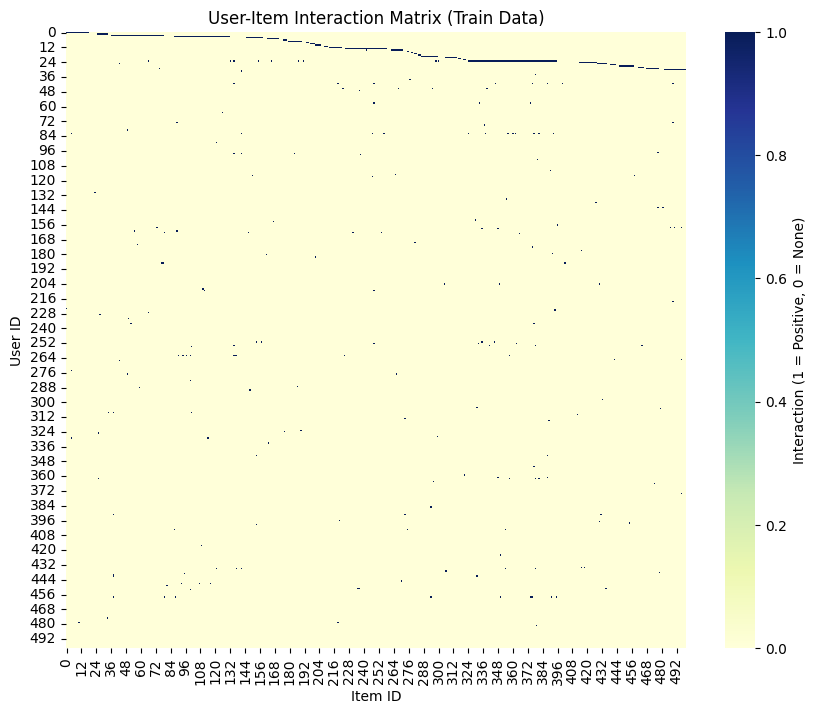

In [36]:
# Function to plot a heatmap for a subset of the user-item matrix
def plot_interaction_heatmap(data_matrix, title, num_users=500, num_items=500):
    """
    Plots a heatmap of a subset of the user-item interaction matrix.
    Parameters:
        data_matrix: The matrix to visualize.
        title: The title of the plot.
        num_users: The number of users to display (rows).
        num_items: The number of items to display (columns).
    """
    # Extract a subset of the matrix for visualization purposes
    matrix_subset = data_matrix[:num_users, :num_items]

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap="YlGnBu", cbar=True, cbar_kws={'label': 'Interaction (1 = Positive, 0 = None)'})
    plt.xlabel('Item ID')
    plt.ylabel('User ID')
    plt.title(title)
    plt.show()

# Visualize a subset of the training and testing matrices
plot_interaction_heatmap(train_data_matrix, 'User-Item Interaction Matrix (Train Data)')

## Item-to-Item Collaborative Filtering with Implicit Feedback

In [37]:
# Compute the item-item similarity matrix
item_similarity = cosine_similarity(train_data_matrix.T)
print("Item-Item Similarity Matrix:")
print(item_similarity)
print(item_similarity.shape)

Item-Item Similarity Matrix:
[[1.         0.40824829 0.33333333 ... 0.         0.         0.        ]
 [0.40824829 1.         0.40824829 ... 0.         0.         0.        ]
 [0.33333333 0.40824829 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]
(15109, 15109)


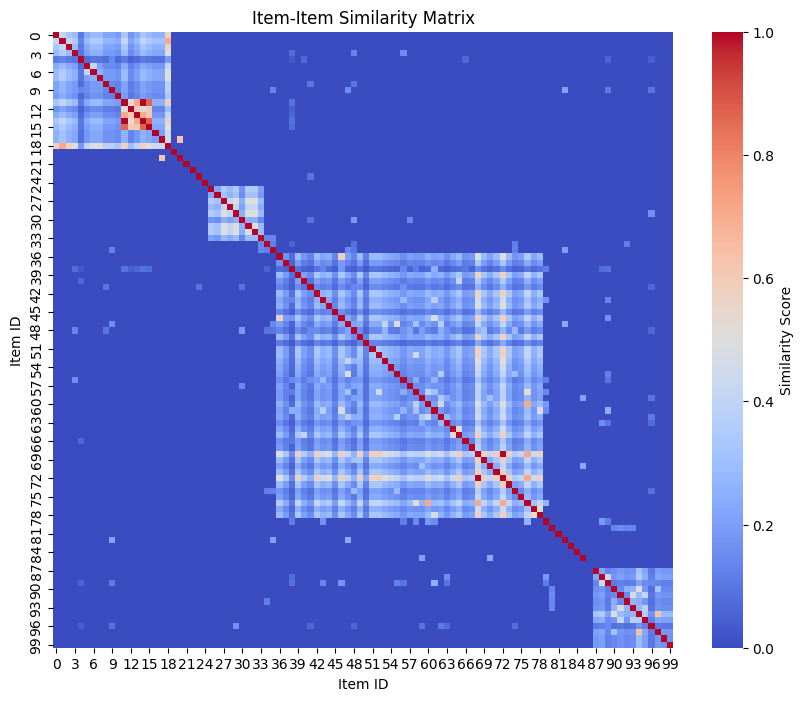

In [38]:
# Function to visualize the item similarity matrix
def plot_item_similarity_heatmap(similarity_matrix, title, num_items=100):
    """
    Plots a heatmap of a subset of the item similarity matrix.
    Parameters:
        similarity_matrix: The item-item similarity matrix.
        title: The title of the plot.
        num_items: The number of items to display (both rows and columns).
    """
    # Extract a subset of the matrix for visualization
    matrix_subset = similarity_matrix[:num_items, :num_items]

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap="coolwarm", cbar=True, cbar_kws={'label': 'Similarity Score'})
    plt.xlabel('Item ID')
    plt.ylabel('Item ID')
    plt.title(title)
    plt.show()

# Visualize a subset of the item similarity matrix
plot_item_similarity_heatmap(item_similarity, 'Item-Item Similarity Matrix')

In [39]:
# Define the function to predict interactions based on item similarity
def item_based_predict(interactions, similarity, epsilon=1e-9):
    """
    Predicts user-item interactions based on item-item similarity.
    Parameters:
        interactions (numpy array): The user-item interaction matrix.
        similarity (numpy array): The item-item similarity matrix.
        epsilon (float): Small constant added to the denominator to avoid division by zero.
    Returns:
        numpy array: The predicted interaction scores for each user-item pair.
    """
    # np.dot does the matrix multiplication. Here we are calculating the
    # weighted sum of interactions based on item similarity
    pred = similarity.dot(interactions.T) / (similarity.sum(axis=1)[:, np.newaxis] + epsilon)
    return pred.T  # Transpose to get users as rows and items as columns

# Calculate the item-based predictions for positive interactions
item_prediction = item_based_predict(train_data_matrix, item_similarity)
print("Predicted Interaction Matrix:")
print(item_prediction)
print(item_prediction.shape)

Predicted Interaction Matrix:
[[0.46097255 0.85435984 0.71867834 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(7838, 15109)


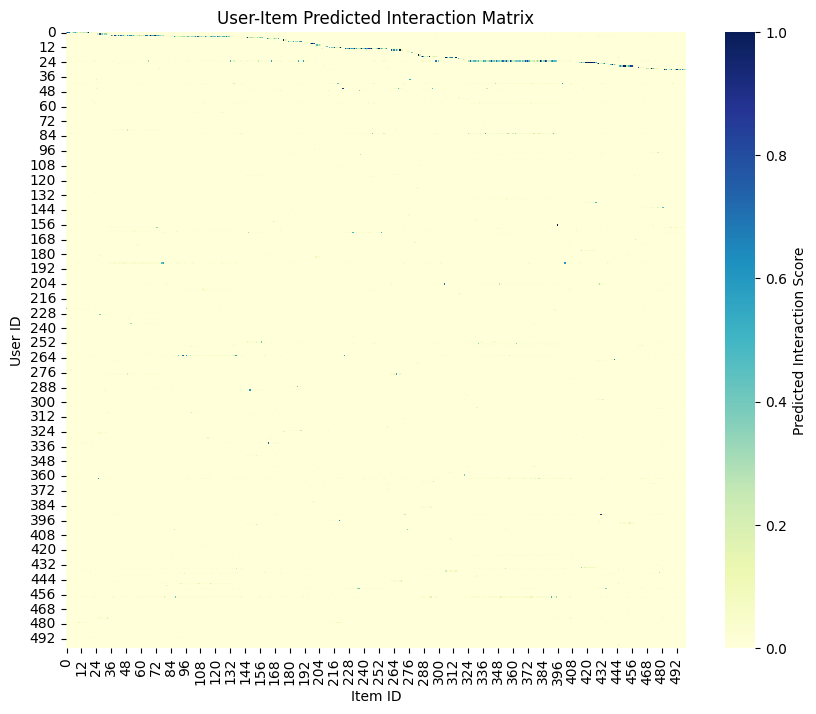

In [40]:
# Function to visualize the predicted interaction matrix for a subset of users and items
def plot_interaction_prediction_heatmap(prediction_matrix, title, num_users=500, num_items=500):
    """
    Plots a heatmap of a subset of the user-item predicted interaction matrix.
    Parameters:
        prediction_matrix: The predicted interaction matrix.
        title: The title of the plot.
        num_users: The number of users to display (rows).
        num_items: The number of items to display (columns).
    """
    # Extract a subset of the matrix for visualization
    matrix_subset = prediction_matrix[:num_users, :num_items]

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap="YlGnBu", cbar=True, cbar_kws={'label': 'Predicted Interaction Score'})
    plt.xlabel('Item ID')
    plt.ylabel('User ID')
    plt.title(title)
    plt.show()

# Visualize a subset of the predicted interaction matrix
plot_interaction_prediction_heatmap(item_prediction, 'User-Item Predicted Interaction Matrix')

## Evaluating Our Recommenders

In [41]:
#Defining the function for precision and recall @K
def precision_recall_at_k(prediction, ground_truth, k=10):
    """
    Calculates Precision@K and Recall@K for top-K recommendations.
    Parameters:
        prediction (numpy array): The predicted interaction matrix with scores.
        ground_truth (numpy array): The ground truth interaction matrix (binary).
        k (int): Number of top recommendations to consider.
    Returns:
        precision_at_k (float): The average precision@K over all users.
        recall_at_k (float): The average recall@K over all users.
    """
    num_users = prediction.shape[0]
    precision_at_k, recall_at_k = 0, 0

    for user in range(num_users):
        # Get the indices of the top-K items for the user based on predicted scores
        top_k_items = np.argsort(prediction[user, :])[-k:]

        # Calculate the number of relevant items in the top-K items for the user
        relevant_items_in_top_k = np.isin(top_k_items, np.where(ground_truth[user, :] == 1)[0]).sum()

        # Calculate the total number of relevant items for the user
        total_relevant_items = ground_truth[user, :].sum()

        # Precision@K and Recall@K for this user
        precision_at_k += relevant_items_in_top_k / k
        recall_at_k += relevant_items_in_top_k / total_relevant_items if total_relevant_items > 0 else 0

    # Average Precision@K and Recall@K over all users
    precision_at_k /= num_users
    recall_at_k /= num_users

    return precision_at_k, recall_at_k

In [42]:
#Precision and recall @k for user- and item-based CF
#precision_user_k, recall_user_k = precision_recall_at_k(user_prediction, test_data_matrix, k=10)
precision_item_k, recall_item_k = precision_recall_at_k(item_prediction, test_data_matrix, k=10)

#print('User-based CF Precision@K:', precision_user_k)
#print('User-based CF Recall@K:', recall_user_k)
print('Item-based CF Precision@K:', precision_item_k)
print('Item-based CF Recall@K:', recall_item_k)

Item-based CF Precision@K: 0.055639193671857864
Item-based CF Recall@K: 0.26401546197183495


In [43]:
# prompt: write some code calculating the mean average precisions @10

def mean_average_precision_at_k(predictions, true_positives, k=10):
    """
    Calculates the Mean Average Precision@K (MAP@K) metric.

    Args:
        predictions (numpy.ndarray): A matrix of predicted relevance scores
                                      (users x items).
        true_positives (numpy.ndarray): A binary matrix of true positive interactions
                                        (users x items).
        k (int): The cutoff value for the top-k recommendations.

    Returns:
        float: The MAP@K score.
    """
    map_at_k = 0
    n_users = predictions.shape[0]

    for user in range(n_users):
        predicted_ranks = np.argsort(predictions[user])[::-1][:k]  # Top k predictions
        true_positives_in_rank = np.isin(predicted_ranks, np.where(true_positives[user] == 1)[0])

        precision_at_i = []
        for i in range(k):
            if true_positives_in_rank[i]:  # Check if item at rank i is a true positive
                precision_at_i.append(np.sum(true_positives_in_rank[:i+1]) / (i+1))

        if len(precision_at_i) > 0:  # To avoid division by zero if no relevant items are predicted
            average_precision = np.sum(precision_at_i) / np.sum(true_positives[user])
        else:
            average_precision = 0

        map_at_k += average_precision

    map_at_k /= n_users  # Average over all users
    return map_at_k


# Example usage (replace with your actual predictions and true positives):
# Assuming you have 'item_prediction' and 'test_data_matrix' as in your code.
map_k = mean_average_precision_at_k(item_prediction, test_data_matrix, k=10)
print(f"Mean Average Precision@10: {map_k}")


Mean Average Precision@10: 0.16132308390988753
